<a href="https://colab.research.google.com/github/sammainahkinya1404/A-novel-detection-method-based-on-DETR-for-drone-aerial-images/blob/main/Advanced_Design_and_Analysis_of_the_Algorithm(A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def approx_vertex_cover(self):
        cover = set()
        # Iterate through each edge
        for u in self.graph:
            for v in self.graph[u]:
                if v not in cover and u not in cover:
                    cover.add(u)
                    cover.add(v)
        return cover

def exact_vertex_cover(graph):
    min_cover = None
    nodes = list(graph.nodes())
    for i in range(1, 2**len(nodes)):
        cover = [nodes[j] for j in range(len(nodes)) if (i & (1 << j))]
        if is_vertex_cover(graph, cover):
            if min_cover is None or len(cover) < len(min_cover):
                min_cover = cover
    return min_cover

def is_vertex_cover(graph, cover):
    cover_set = set(cover)
    for u, v in graph.edges():
        if u not in cover_set and v not in cover_set:
            return False
    return True

def generate_test_graphs():
    test_graphs = []
    # Graph 1: Simple square
    G1 = nx.Graph()
    G1.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
    test_graphs.append(G1)
    # Graph 2: Triangle with a tail
    G2 = nx.Graph()
    G2.add_edges_from([(0, 1), (1, 2), (2, 0), (2, 3)])
    test_graphs.append(G2)
    # Graph 3: Complete graph K5
    G3 = nx.complete_graph(5)
    test_graphs.append(G3)
    # Graph 4: Cycle graph C6
    G4 = nx.cycle_graph(6)
    test_graphs.append(G4)
    # Graph 5: Random graph
    G5 = nx.gnm_random_graph(10, 20)
    test_graphs.append(G5)
    return test_graphs

def evaluate_algorithm():
    test_graphs = generate_test_graphs()
    results = []
    for i, G in enumerate(test_graphs):
        graph = Graph(len(G.nodes))
        for u, v in G.edges:
            graph.add_edge(u, v)

        start_time = time.time()
        approx_cover = graph.approx_vertex_cover()
        approx_time = time.time() - start_time

        start_time = time.time()
        exact_cover = exact_vertex_cover(G)
        exact_time = time.time() - start_time

        results.append((i+1, len(G.nodes), len(G.edges), len(approx_cover), len(exact_cover), approx_time, exact_time))
    return test_graphs, results

def plot_table(results):
    labels = ['Graph', 'Vertices', 'Edges', 'Approx. Cover', 'Exact Cover', 'Approx. Time (s)', 'Exact Time (s)']
    fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size for better readability
    ax.axis('tight')
    ax.axis('off')

    table = plt.table(cellText=results, colLabels=labels, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Increase scaling factor for larger table

    plt.title('Vertex Cover Approximation Results', fontsize=16)
    plt.show()

def plot_graphs(test_graphs):
    for i, G in enumerate(test_graphs):
        plt.figure(figsize=(8, 6))
        nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
        plt.title(f'Test Graph {i+1}')
        plt.show()
def plot_comparison_graph(results):
    fig, ax = plt.subplots()
    graph_ids = range(1, len(results) + 1)
    exact_covers = [result[4] for result in results]
    approx_covers = [result[3] for result in results]

    ax.plot(graph_ids, exact_covers, label='Exact Cover', marker='o')
    ax.plot(graph_ids, approx_covers, label='Approx. Cover', marker='x')
    ax.set_xticks(graph_ids)
    ax.set_xticklabels(graph_ids)
    ax.set_xlabel('Graph')
    ax.set_ylabel('Cover Size')
    ax.legend()
    ax.set_title('Vertex Cover: Exact vs Approximation')
    plt.show()




In [21]:
if __name__ == "__main__":
    test_graphs, results = evaluate_algorithm()


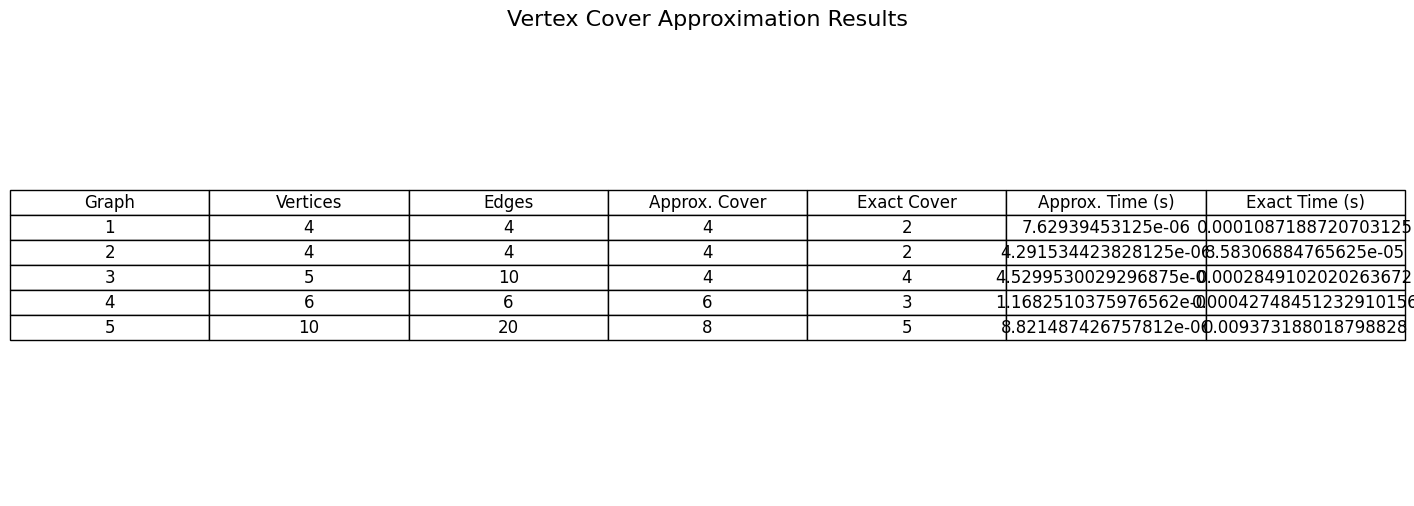

In [22]:
if __name__ == "__main__":
    plot_table(results)


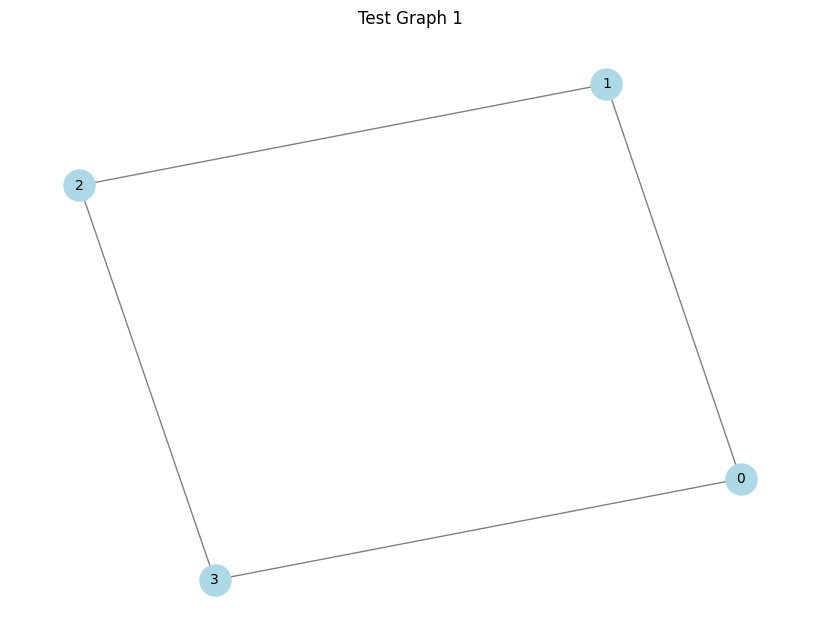

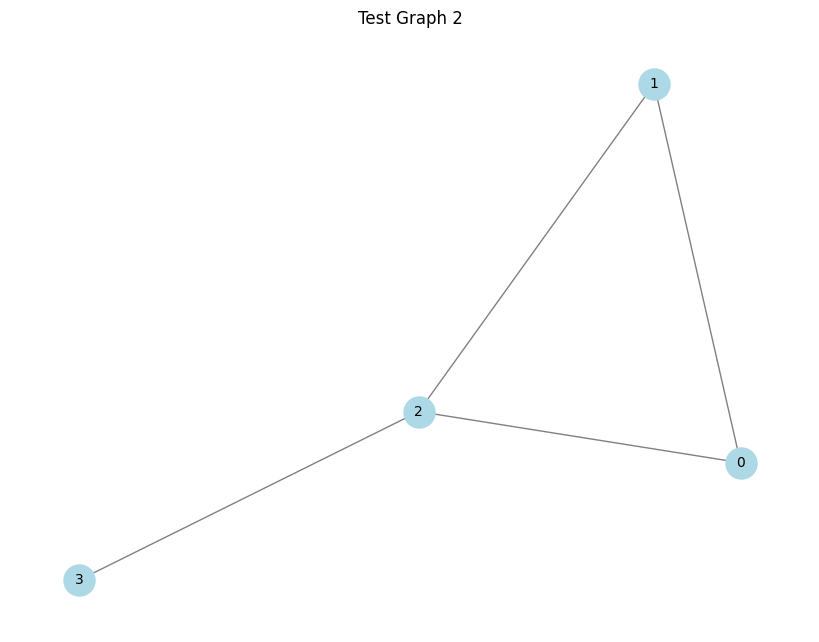

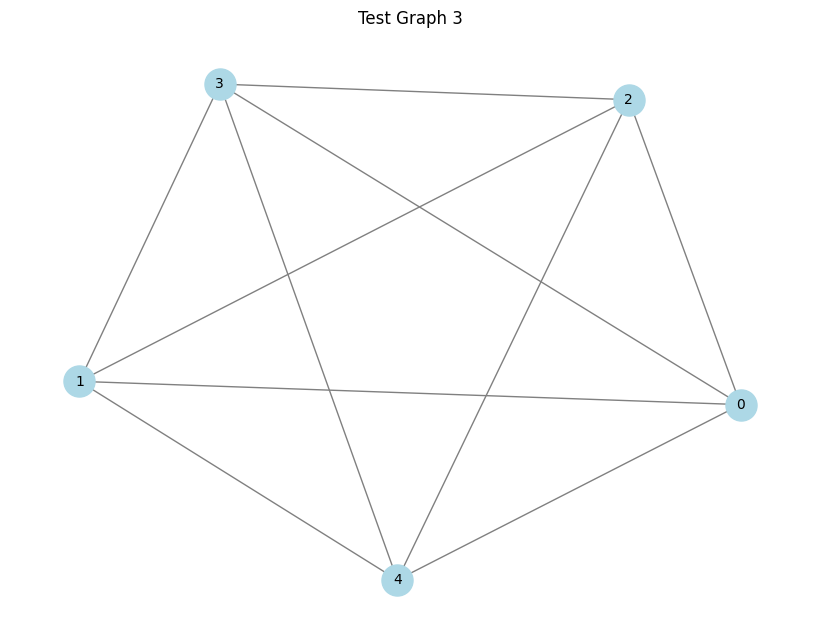

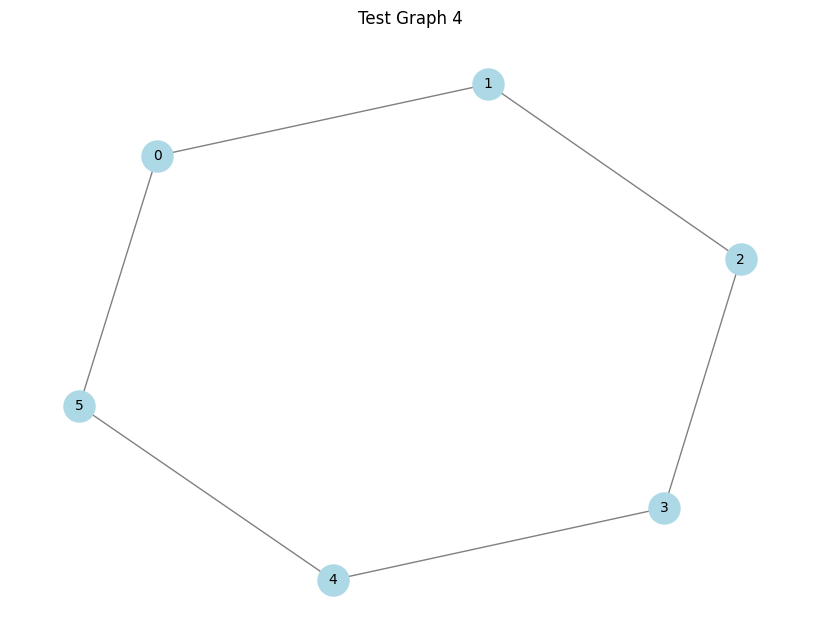

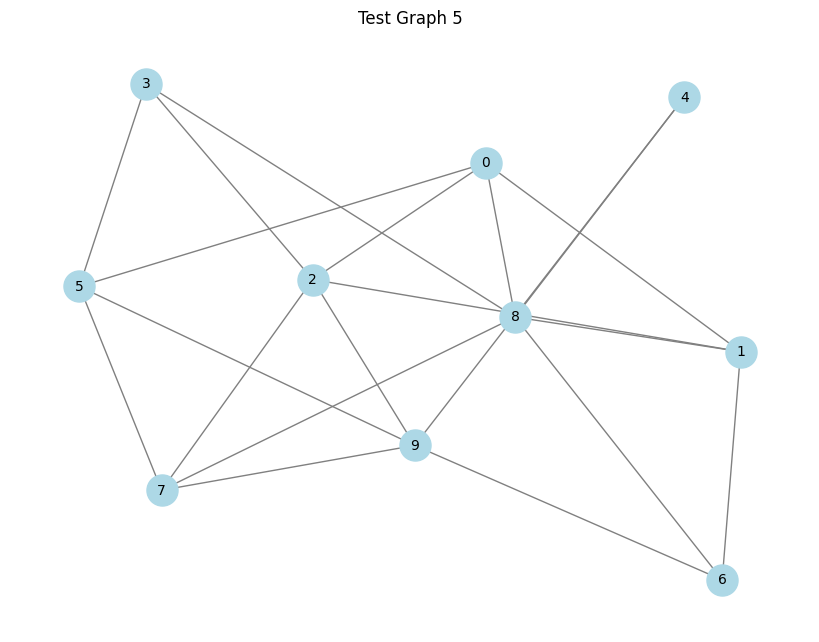

In [23]:
if __name__ == "__main__":
  plot_graphs(test_graphs)

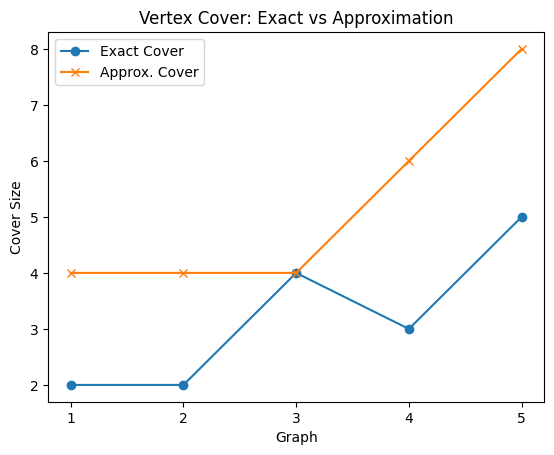

In [25]:
if __name__ == "__main__":
  plot_comparison_graph(results)

